In [15]:
% some housekeeping stuff
register_graphics_toolkit ("gnuplot");
available_graphics_toolkits ();
graphics_toolkit ("gnuplot")
clear
% load packages
pkg load statistics
% end of housekeeping

# External calibration

function of the form $kobs=m1*Pb+m2*KOH*OH*Pb+m2*KCl*Cl*Pb$

so kobs is a function of the ionic lead concentration, hydroxide (pH) and total chloride.  We know everything except kobs and the three slopes when we do the calibration.

so you need to measure enough samples where the known things vary in order to determine those unknown things.


In [16]:
% lets make a few points

% solutions pH 6.5 and 7.5 and total Cl 1e-3 and 1e-2 (I just picked these arbitrarly)

Kw=1e-14; pH=[7.5 7.5 6.5 6.5]; H=10.^-pH; OH=Kw./(H); KOH=10^6;
Cl=[1e-3 1e-2 1e-3 1e-2]; KCl=10^1.5; 
Pb=[2e-6 1e-6 4e-6 3e-6]; 
% I just made up values.  assuming the same total lead but making free lead lower when there was more complexation
m1=1e5; m2=1e5; m3=1e4;

% so here is an anonymous function that will return kobs

f = @(m1,m2,m3,Pb,KCl,KOH,OH,Cl) (m1.*Pb+m1.*KOH.*OH.*Pb+m3.*KCl.*Cl.*Pb);

kobs=f(m1,m2,m3,Pb,KCl,KOH,OH,Cl)



kobs =

   0.2639   0.1348   0.4139   0.3190



so pretend this is real data.  you would know Pb, OH, Cl, KOH, KCl and then determine m1, m2, m3

we can't make a plot like we would in a normal calibration because we have 3 independent variables

so what we do is compare our calculated kobs just as a function of m1, m2 and m3


kobs_calc1 =

   0.5278   0.2696   0.8278   0.6379

SSE1 = 0.3609
kobs_calc2 =

   0.3961   0.2038   0.6215   0.4832

SSE2 = 0.092314


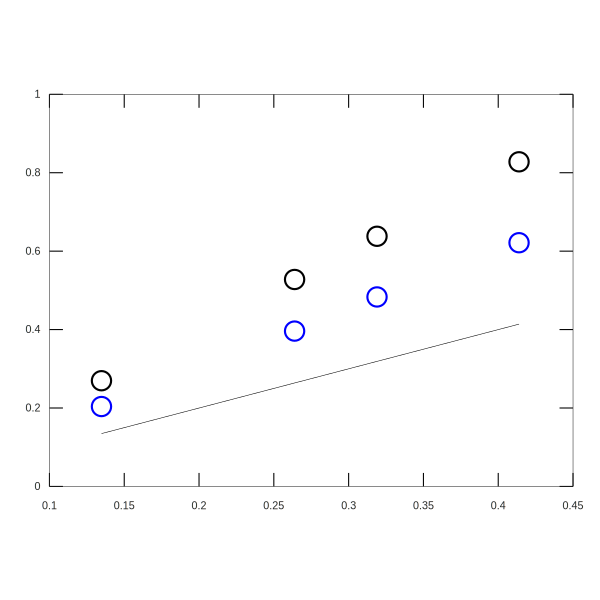

In [17]:
%plot -s 600,600 -f 'svg'

m1=2e5; m2=1e5; m3=2e4;
kobs_calc1=f(m1,m2,m3,Pb,KCl,KOH,OH,Cl)

% and detemrine sum of squares of the error

SSE1=sum((kobs-kobs_calc1).^2)

m1=1.5e5; m2=1e5; m3=2e4;
kobs_calc2=f(m1,m2,m3,Pb,KCl,KOH,OH,Cl)

% and detemrine sum of squares of the error

SSE2=sum((kobs-kobs_calc2).^2)

% matlab optimizer will vary m1, m2, m3 in order to determine the best-fit values

% to visualize we plot predicted versus observed

plot(kobs,kobs_calc1,'ko',kobs,kobs,'k-',kobs,kobs_calc2,'bo')

you can see the second guess is closer to the one to one line. and SSE2 is lower than SSE1

# internal calibration

ok lets start using the term internal calibration.  that should confuse you less than standard additions

so in this instance we just need to know eventually we will get a linear response as we add lead

if there is no strong complexation we will just get a linear response as we add lead

but if there is strong complexation we will get a flatter response until the strong ligand(s) are consumed

signal =

     0    10    50   100   250   500



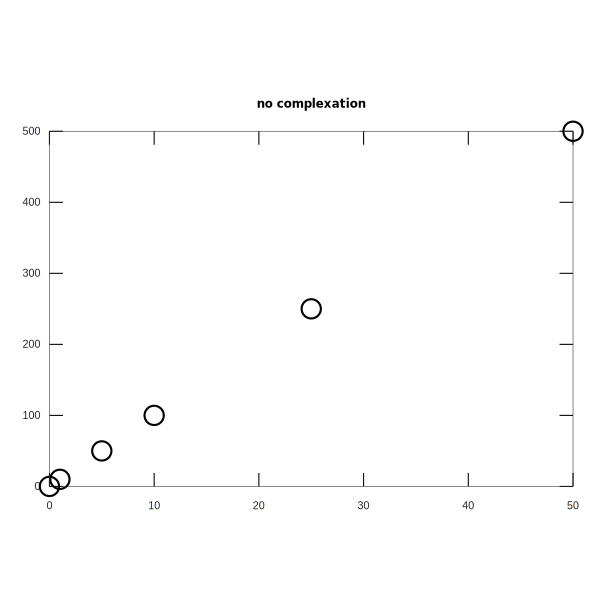

In [18]:
%plot -s 600,600 -f 'svg'

PbT=[0 1 5 10 25 50]; slope=10; signal=slope*PbT

plot(PbT,signal,'ko')
title('no complexation')

so the slope will be determined by the exact mix of the initial sample.  how much chloride, sulphate, bicarbonate,
everything

it will be a different slope for each sample but all the lead generates signal

so all the lead is proportional to the bioavailable form of lead (no matter what specific species of lead)

all species of lead will vary linearlly because none of the ligands are running out

now if there is complexation initially it will "dampen" the curve initially

lowsignal =

    10    15    60   165



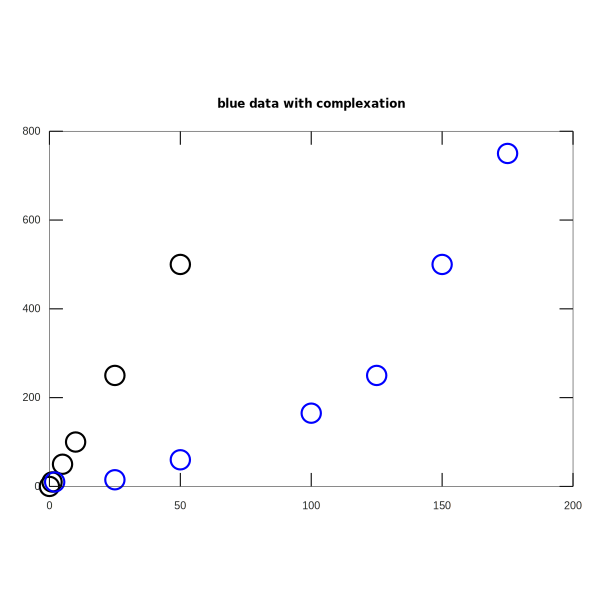

In [19]:
%plot -s 600,600 -f 'svg'

strongligandconc=100;
PbT2=[25 50 75]; slope=10; signal2=slope*PbT2;
lowPbT2=[2 25 50 100]; lowsignal=[10 15 60 165]

plot(PbT,signal,'ko',PbT2+strongligandconc,signal2,'bo',lowPbT2,lowsignal,'bo')
title('blue data with complexation')

see the slopes are the same.  it is just delayed getting to the slope

for this I assumed 100 units of strong complexation capacity.  

once that is used up we get the same linear response as if we didn't have strong ligand

so you determine the slope of that linear portion and use that to calculate the bioavailable lead for all the data

see the intercept is 100, that is the binding capacity

use slope to determine bioavailable lead (I just had a slope of 10 here because i picked it. you would find 
by regression)

$ Pb_{bioavail}=\dfrac{signal}{slope} $

bioavailablePb =

    1.0000    1.5000    6.0000   16.5000   25.0000   50.0000   75.0000



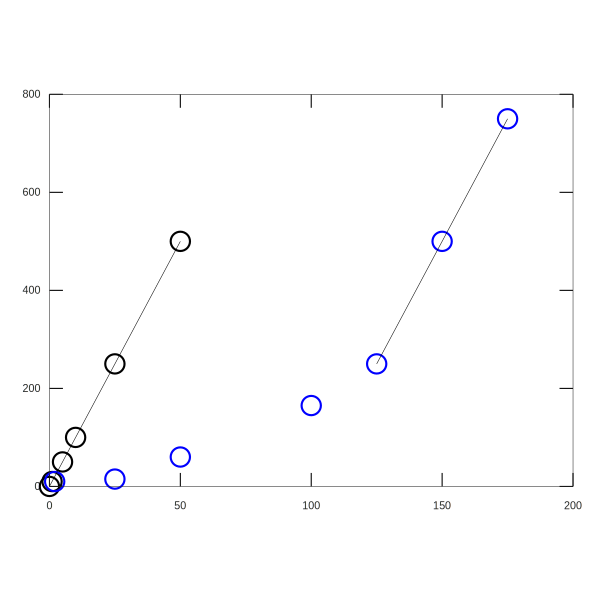

In [20]:
%plot -s 600,600 -f 'svg'

plot(PbT,signal,'ko',PbT2+strongligandconc,signal2,'bo',lowPbT2,lowsignal,'bo')
hold on
plot(PbT,slope*PbT,'k-')
plot(PbT2+strongligandconc,slope*PbT2,'k-')

% use slope to determine bioavailable lead

bioavailablePb=[lowsignal signal2]/slope



see how the bioavailable lead at the 3 higher points matches the total lead I used to 
simulate the data in the first place.

that is because once the complexation is used up all the added lead is assumed to be bioavailable

and notice once we know the slope we can quantify the bioavaillable lead for the points during
complexation